<a href="https://colab.research.google.com/github/eliseobao/redsm5/blob/main/analysis/lexical/ner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NER

In [2]:
!python3 -m spacy download en_core_web_sm

/usr/local/lib/python3.11/site-packages/torch/cuda/__init__.py:129: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 48.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
import spacy

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from collections import Counter

nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.11/site-packages/torch/cuda/__init__.py:129: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [4]:
SYMPTOMS = [
    "NO_SYMPTOMS",
    "DEPRESSED_MOOD",
    "ANHEDONIA",
    "APPETITE_CHANGE",
    "SLEEP_ISSUES",
    "PSYCHOMOTOR",
    "FATIGUE",
    "WORTHLESSNESS",
    "COGNITIVE_ISSUES",
    "SUICIDAL_THOUGHTS",
]

In [5]:
data = pd.read_csv("data/redsm5.csv")

texts_per_symptom = {}
for symptom in SYMPTOMS:
    texts_per_symptom[symptom] = data.loc[
        data["labels"].str.contains(symptom), "text"
    ].tolist()

In [6]:
def analyze_named_entities(text):
    """
    Analyze named entities in the given text.

    Parameters:
    - text (str): The input text to analyze.

    Returns:
    Tuple[dict, Union[tuple, None]]: A tuple containing:
        - A dictionary of named entity type percentages.
        - A tuple representing the most referenced named entity and its entity type, or None if no entities are found.
    """
    doc = nlp(text)

    named_entities = [(ent.text, ent.label_) for ent in doc.ents]

    if not named_entities:
        return {}, None

    entity_types = [ent_type for _, ent_type in named_entities]
    entity_type_counts = Counter(entity_types)

    total_entities = len(entity_types)
    entity_type_percentages = {
        ent_type: count / total_entities * 100
        for ent_type, count in entity_type_counts.items()
    }

    most_referenced_entity, _ = max(Counter(named_entities), key=lambda x: x[1])

    return entity_type_percentages, most_referenced_entity

In [7]:
results = {}
for symptom in SYMPTOMS:
    print(f"Analyzing {symptom} texts")
    results[symptom] = [
        analyze_named_entities(text) for text in tqdm(texts_per_symptom[symptom])
    ]

Analyzing NO_SYMPTOMS texts


  0%|          | 0/392 [00:00<?, ?it/s]

100%|██████████| 392/392 [00:30<00:00, 12.88it/s]


Analyzing DEPRESSED_MOOD texts


100%|██████████| 328/328 [00:16<00:00, 20.41it/s]


Analyzing ANHEDONIA texts


100%|██████████| 124/124 [00:04<00:00, 29.15it/s]


Analyzing APPETITE_CHANGE texts


100%|██████████| 44/44 [00:02<00:00, 20.54it/s]


Analyzing SLEEP_ISSUES texts


100%|██████████| 102/102 [00:04<00:00, 23.41it/s]


Analyzing PSYCHOMOTOR texts


100%|██████████| 35/35 [00:02<00:00, 16.21it/s]


Analyzing FATIGUE texts


100%|██████████| 124/124 [00:06<00:00, 19.92it/s]


Analyzing WORTHLESSNESS texts


100%|██████████| 311/311 [00:13<00:00, 22.39it/s]


Analyzing COGNITIVE_ISSUES texts


100%|██████████| 59/59 [00:02<00:00, 26.60it/s]


Analyzing SUICIDAL_THOUGHTS texts


100%|██████████| 165/165 [00:05<00:00, 28.84it/s]


In [8]:
for symptom, result in results.items():
    total_entity_type_percentages = Counter()
    most_referenced_entities = {}

    for entity_type_percentages, most_referenced_entity in result:
        total_entity_type_percentages.update(entity_type_percentages)

        if most_referenced_entity:
            most_referenced_entities[
                texts_per_symptom[symptom][
                    result.index((entity_type_percentages, most_referenced_entity))
                ]
            ] = most_referenced_entity

    total_entities_across_texts = sum(total_entity_type_percentages.values())
    overall_entity_type_percentages = {
        ent_type: count / total_entities_across_texts * 100
        for ent_type, count in total_entity_type_percentages.items()
    }

    print(f"\n{symptom}")
    for ent_type, percentage in overall_entity_type_percentages.items():
        print(f"{ent_type}: {percentage:.2f}%")


NO_SYMPTOMS
ORG: 8.76%
DATE: 33.57%
CARDINAL: 15.16%
ORDINAL: 5.63%
GPE: 4.21%
PERCENT: 1.91%
TIME: 11.95%
QUANTITY: 0.80%
PERSON: 13.92%
NORP: 1.19%
PRODUCT: 0.77%
FAC: 0.38%
LANGUAGE: 0.04%
WORK_OF_ART: 0.53%
LOC: 0.24%
LAW: 0.13%
MONEY: 0.80%
EVENT: 0.01%

DEPRESSED_MOOD
ORG: 6.84%
DATE: 47.17%
CARDINAL: 16.14%
PERSON: 8.37%
TIME: 8.50%
GPE: 3.48%
ORDINAL: 4.71%
NORP: 1.39%
FAC: 0.08%
MONEY: 0.66%
PRODUCT: 0.45%
LOC: 0.43%
EVENT: 0.02%
PERCENT: 0.63%
QUANTITY: 0.62%
WORK_OF_ART: 0.37%
LANGUAGE: 0.02%
LAW: 0.11%

ANHEDONIA
ORDINAL: 3.16%
DATE: 49.84%
CARDINAL: 18.89%
PERSON: 5.29%
TIME: 7.06%
ORG: 8.90%
LOC: 0.37%
GPE: 3.05%
NORP: 1.27%
QUANTITY: 0.65%
MONEY: 0.18%
PERCENT: 0.45%
PRODUCT: 0.73%
EVENT: 0.10%
LANGUAGE: 0.08%

APPETITE_CHANGE
CARDINAL: 19.98%
ORG: 9.56%
GPE: 1.86%
DATE: 46.94%
TIME: 6.19%
QUANTITY: 2.17%
PERSON: 6.64%
ORDINAL: 4.32%
PERCENT: 0.61%
LOC: 0.08%
FAC: 0.08%
MONEY: 0.34%
NORP: 0.55%
EVENT: 0.67%

SLEEP_ISSUES
TIME: 33.17%
CARDINAL: 13.97%
ORG: 6.01%
DATE: 31

/tmp/ipykernel_9/1786107977.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('cubehelix')


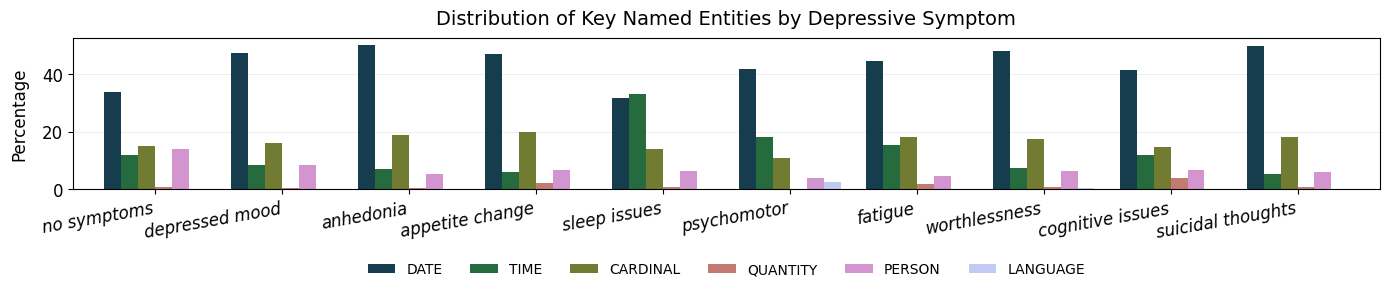

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict, Counter

# 1. Define the entity types
selected_entities = ["DATE", "TIME", "CARDINAL", "QUANTITY", "PERSON", "LANGUAGE"]

# 2. Aggregate percentages per symptom
plot_data = defaultdict(dict)
for symptom, result in results.items():
    counts = Counter()
    for etypes, _ in result:
        counts.update(etypes)
    total = sum(counts.values())
    if total == 0:
        continue
    label = symptom.replace("_", " ").lower()
    for et in selected_entities:
        plot_data[label][et] = (counts.get(et, 0) / total) * 100

# 3. Build DataFrame (symptoms as rows)
df_plot = pd.DataFrame(plot_data).T

# 4. Cubehelix palette avoiding near-white extremes
n_entities = len(df_plot.columns)
cmap = plt.cm.get_cmap('cubehelix')
positions = np.linspace(0.2, 0.8, n_entities)
colors = [cmap(pos) for pos in positions]

# 5. **Set a wide figure size for two-column span**
fig_width = 14   # ~14 inches wide
fig_height = 3.5   # keep height moderate
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# 6. Plot grouped vertical bars
df_plot.plot(
    kind='bar',
    ax=ax,
    width=0.8,
    color=colors,
    fontsize=12
)

# 7. Labeling
# ax.set_xlabel("Symptom", fontsize=12, labelpad=10)
ax.set_ylabel("Percentage", fontsize=12, labelpad=10)
ax.set_title("Distribution of Key Named Entities by Depressive Symptom", fontsize=14, pad=10)

# Italicize and rotate x-tick labels
for lbl in ax.get_xticklabels():
    lbl.set_fontstyle('italic')
    lbl.set_rotation(10)
    lbl.set_ha('right')

# Legend below the plot
ax.legend(
    # title="Entity Type",
    loc='upper center',
    bbox_to_anchor=(0.5, -0.4),
    ncol=n_entities,
    frameon=False
)

# Horizontal grid lines
ax.set_axisbelow(True)
ax.grid(axis='y', linestyle='-', linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.savefig("analysis/visuals/ner.pdf", bbox_inches="tight", dpi=300)
plt.show()
